In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [9]:
# 1. Генерація класифікаційних даних вручну

np.random.seed(42)

n_samples = 500

# Клас 0: точки навколо (0,0)
class0_x = np.random.normal(0, 1, (n_samples//2, 2))

# Клас 1: точки навколо (3,3)
class1_x = np.random.normal(3, 1, (n_samples//2, 2))

# Об’єднуємо
X = np.vstack([class0_x, class1_x])
y = np.hstack([np.zeros(n_samples//2), np.ones(n_samples//2)])

df = pd.DataFrame(X, columns=['feature_1', 'feature_2'])
df['target'] = y

df.head()

,feature_1,feature_2,target
0,0.496714,-0.138264,0.0
1,0.647689,1.523030,0.0
2,-0.234153,-0.234137,0.0
3,1.579213,0.767435,0.0
4,-0.469474,0.542560,0.0


In [10]:
# 2. Розділення

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [11]:
# 3. Масштабування

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# 4. Logistic Regression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

Accuracy: 0.97
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97        50
         1.0       0.96      0.98      0.97        50

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



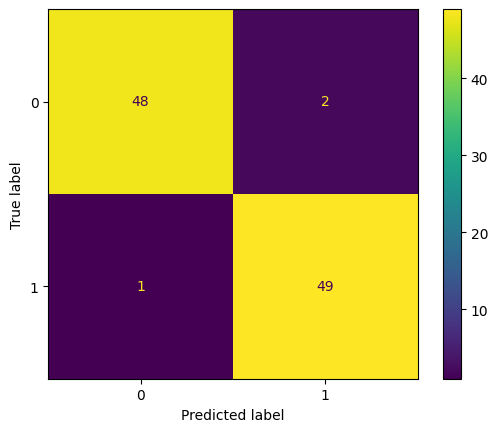

In [13]:
# 5. Метрики

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

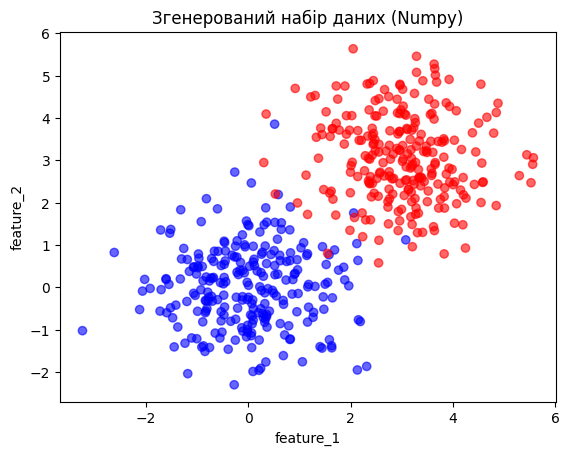

In [14]:
# 6. Візуалізація кластерів

plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', alpha=0.6)
plt.title("Згенерований набір даних (Numpy)")
plt.xlabel("feature_1")
plt.ylabel("feature_2")
plt.show()